In [1]:
from bs4 import BeautifulSoup
import requests
import re
import json
from PIL import Image
from io import BytesIO
import urllib.request
import emoji

# Extraction from tag with property

In [2]:
def extract(soup,tag,prop):
    extraction = soup.find(tag, prop)
    extraction = extraction.text
    extraction = " ".join(extraction.split())
    return extraction

# Search Player

In [9]:
name = "cristante"
name = name.replace(' ','+')    
url = requests.get("https://www.transfermarkt.it/schnellsuche/ergebnis/schnellsuche?query="+name,headers={'User-Agent': 'Custom'})
htmltext = url.text
soup = BeautifulSoup(htmltext,features="lxml")
playercode = soup.find("div", {"id" : "yw0"})
playercode = playercode.find("tr", {"class" : "odd"})
if playercode != None:
    playercode = playercode.find("td", {"class" : "hauptlink"})
    playercode = playercode.find("a")
    playercode = playercode.get('href')
    print(playercode)
else: 
    print('Not Found')
#soup.find_all("tr", {"class" : "odd"})

/bryan-cristante/profil/spieler/199248


In [10]:

player = 'https://www.transfermarkt.it'+str(playercode)
urlPlayer = requests.get(player,headers={'User-Agent': 'Custom'})

htmlplayer = urlPlayer.text
soup = BeautifulSoup(htmlplayer)#make soup that is parse-able by bs
marketValue = soup.find("a", {"class" : "data-header__market-value-wrapper"})

playername = extract(soup,"h1", {"class" : "data-header__headline-wrapper"})

num = playername.split(' ')[0]
match = re.search(' ', playername)
if match:
    nome = playername[match.end():]
else:
    nome = ''
    
print(num)
print(nome)

#4
Bryan Cristante


In [27]:
soup = soup.find("main")
tables = soup.findAll("div",{"class" : "row"})
for item in tables:
    result = item.find("h2",{"class" : "content-box-headline"}).text
    if "Risultati società" in result:
        print("YAY" + result)


YAYRisultati società                    - 65 risultati


# Search Team

In [3]:
name = "Juventus"
name = name.replace(' ','+')    
url = requests.get("https://www.transfermarkt.it/schnellsuche/ergebnis/schnellsuche?query="+name,headers={'User-Agent': 'Custom'})
htmltext = url.text
soup = BeautifulSoup(htmltext,features="lxml")#make soup that is parse-able by bs
soup = soup.find("main")
tables = soup.findAll("div",{"class" : "row"})
check = False
for item in tables:
    result = item.find("h2",{"class" : "content-box-headline"}).text
    if "Risultati società" in result:
        check = True
        soup = item
        break
if check == False:
    print('Not Found')
else:
    squadcode = soup.find("div", {"class" : "grid-view"})
    if squadcode != None:
        squadcode = squadcode.find("tr", {"class" : "odd"})
        squadcode = squadcode.find("td", {"class" : "hauptlink"})
        squadcode = squadcode.find("a")
        squadcode = squadcode.get('href')
        print(squadcode)
    else: 
        print('Not Found')


/juventus-turin/startseite/verein/506


In [4]:

squad = 'https://www.transfermarkt.it'+str(squadcode)
urlPlayer = requests.get(squad,headers={'User-Agent': 'Custom'})

htmlplayer = urlPlayer.text
soup = BeautifulSoup(htmlplayer,features="lxml")
marketValue = soup.find("a", {"class" : "data-header__market-value-wrapper"})

roster = soup.find("div", {"id" : "yw1"})
roster = roster.find("tbody")
players = roster.findAll("tr",{"class" : ['odd', 'even']})
goalkeepers = ""
defenders = ""
midfielders = ""
forwards = ""
for player in players:
    role = player.find('td').get('title')
    table = player.find("table",{"class":"inline-table"})
    nome = table.find("td",{"class":"hauptlink"}).find("a")
    nome = nome.text
    ruolo = table.findAll("tr")
    ruolo = ruolo[1].text
    columns = player.findAll("td",{"class":"zentriert"})
    birthDate = columns[1].text
    flag = columns[2].find("img", {"class" : "flaggenrahmen"}).get('title')
    marketValue = player.find("td", {"class" : "rechts hauptlink"}).text
    if role == 'Porta':
        goalkeepers += (nome + ' ' + ruolo + ' ' + birthDate + ' ' + flag + ' ' + marketValue + '\n')
    elif role == 'Difesa':
        defenders += (nome + ' ' + ruolo + ' ' + birthDate + ' ' + flag + ' ' + marketValue + '\n')
    elif role == 'Centrocampo':
        midfielders += (nome + ' ' + ruolo + ' ' + birthDate + ' ' + flag + ' ' + marketValue + '\n')
    elif role == 'Attaccante':
        forwards += (nome + ' ' + ruolo + ' ' + birthDate + ' ' + flag + ' ' + marketValue + '\n')   

print(goalkeepers)
print(defenders)
print(midfielders)
print(forwards)

Wojciech Szczesny Portiere 18/apr/1990 (32) Polonia 13,00 mln € 
Mattia Perin Portiere 10/nov/1992 (30) Italia 4,00 mln € 
Carlo Pinsoglio Portiere 16/mar/1990 (32) Italia 300 mila € 

Bremer Difensore centrale 18/mar/1997 (25) Brasile 40,00 mln € 
Federico Gatti Difensore centrale 24/giu/1998 (24) Italia 5,00 mln € 
Leonardo Bonucci Difensore centrale 01/mag/1987 (35) Italia 4,00 mln € 
Daniele Rugani Difensore centrale 29/lug/1994 (28) Italia 2,50 mln € 
Alex Sandro Terzino sinistro 26/gen/1991 (32) Brasile 4,50 mln € 
Danilo Terzino destro 15/lug/1991 (31) Brasile 12,00 mln € 
Mattia De Sciglio Terzino destro 20/ott/1992 (30) Italia 4,50 mln € 

Manuel Locatelli Mediano 08/gen/1998 (25) Italia 30,00 mln € 
Leandro Paredes Mediano 29/giu/1994 (28) Argentina 15,00 mln € 
Paul Pogba Centrale 15/mar/1993 (29) Francia 35,00 mln € 
Adrien Rabiot Centrale 03/apr/1995 (27) Francia 25,00 mln € 
Fabio Miretti Centrale 03/ago/2003 (19) Italia 15,00 mln € 
Nicolò Fagioli Centrale 12/feb/2001 (2

In [7]:
marketValue = soup.find("a", {"class" : "data-header__market-value-wrapper"}).text
marketValue.split('€')


['442,30 mln ', ' \n                Valore rosa/e            \n']

In [9]:
print("https://www.transfermarkt.it/schnellsuche/ergebnis/schnellsuche?query="+"kessie")

https://www.transfermarkt.it/schnellsuche/ergebnis/schnellsuche?query=kessie


# Player Info

In [10]:
marketValue = marketValue.text

In [15]:
maxValue = soup.find("div", {"class" : "tm-player-market-value-development__max-value"})
maxValue = maxValue.text

'80,00 mln €'

In [13]:
marketValue = marketValue.split('€')
value = marketValue[0]
marketValue[1] = marketValue[1].split(':')
update = marketValue[1][1]

' 11/nov/2022'

In [6]:
team = soup.findAll("span", {"class" : "info-table__content info-table__content--bold info-table__content--flex"})
team = team[1]
team = team.findAll("a")
team = team[1]
team = team.text

In [21]:
birthDate = extract(soup,"span", {"itemprop" : "birthDate"})
birthDate = "Data di nascita: "+ birthDate
birthDate

'Data di nascita: 22/ago/1997 (25)'

In [22]:
flag = soup.find("div", {"class" : "data-header__info-box"})
flag = flag.find("img", {"class" : "flaggenrahmen"})
flag = flag.get('title')
flag

'Argentina'

In [19]:
birthPlace = soup.find("span", {"itemprop" : "birthPlace"})
birthPlace = birthPlace.find("span")
birthPlace.get('title')
# print("Luogo di nascita: " + birthPlace + " (" + flag + ")")


'San Vito al Tagliamento'

In [31]:
height = extract(soup,"span", {"itemprop" : "height"})
height = "Altezza: "+ height
height


'Altezza: 1,98 m'

In [32]:
information = soup.find("div", {"class" : "data-header__details"})
position = information.findAll("ul", {"class" : "data-header__items"})
position = position[1].findAll("li")
position = extract(position[1],"span",{"class":"data-header__content"})
position = "Ruolo: "+ position
position

'Ruolo: Portiere'

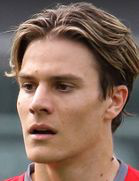

In [7]:
photo = soup.find("div",{"class":"data-header__profile-container"})
photo = photo.find("img", {"class" : "data-header__profile-image"})
photo = photo.get('src')

urllib.request.urlretrieve(photo,"gfg.png")
img = Image.open("gfg.png")
img

# Player Stats

In [5]:
idPlayer = playercode.rsplit('/', 1)[1]
urlPerformance = requests.get("https://www.transfermarkt.it/ceapi/player/"+str(idPlayer)+"/performance",headers={'User-Agent': 'Custom'})

statsplayer = urlPerformance.text
if statsplayer == '[]':
    print('Nessuna statistica')
else:    
    stats = statsplayer.split('}')
    #stats = stats.split('')
    res = {}
    count = 0
    for i in stats:
        i = i + '}'
        i = re.sub(r'^.*?{', '{', i)
        res[count] = i
        count = count + 1
    res.pop(count-1)
    print('Nome giocatore: '+ nome)
    print('Numero Maglia: '+ num)
    for i in res:
        res[i] = json.loads(res[i])
        if(res[i]['goalkeeper'] == False):   
            print('Competizione: '+ res[i]['competitionDescription']+'\n'+
                  'Partite giocate: '+ str(res[i]['gamesPlayed'])+'\n'+
                  'Goal fatti: '+ str(res[i]['goalsScored'])+'\n'+
                  'Assist: '+ str(res[i]['assists'])+'\n'+
                  'Cartellini gialli: '+ str(res[i]['yellowCards'])+'\n'+
                  'Cartellini rossi: '+ str(res[i]['redCards'])+'\n'+
                  'Percentuale di partite da titolare: '+ str(round(res[i]['startElevenPercent'],2))+"%"+'\n'+  
                  'Percentuale di minuti in campo: '+ str(res[i]['minutesPlayedPercent'])+"%")
        else:
            print('Competizione: '+ res[i]['competitionDescription']+'\n'+
                  'Goal subiti: '+ str(res[i]['concededGoals'])+'\n'+
                  'Clean sheets: '+ str(res[i]['cleanSheets'])+'\n'+
                  'Rigori parati: '+ str(res[i]['blockedPenaltyPercent'])+'\n'+
                  'Minuti giocati: '+ str(res[i]['minutesPlayed'])+'\n'+
                  'Percentuale di minuti in campo: '+ str(round(res[i]['minutesPlayedPercent'],2))+"%")
                  

Nome giocatore: Lautaro Martínez
Numero Maglia: #10
Competizione: Serie A
Partite giocate: 21
Goal fatti: 12
Assist: 4
Cartellini gialli: 1
Cartellini rossi: 0
Percentuale di partite da titolare: 90.48%
Percentuale di minuti in campo: 88.83597883597884%
Competizione: Supercoppa Italiana
Partite giocate: 1
Goal fatti: 1
Assist: 0
Cartellini gialli: 1
Cartellini rossi: 0
Percentuale di partite da titolare: 100%
Percentuale di minuti in campo: 100%
Competizione: Champions League
Partite giocate: 6
Goal fatti: 1
Assist: 2
Cartellini gialli: 2
Cartellini rossi: 0
Percentuale di partite da titolare: 83.33%
Percentuale di minuti in campo: 79.81481481481481%
Competizione: Coppa Italia
Partite giocate: 2
Goal fatti: 1
Assist: 1
Cartellini gialli: 1
Cartellini rossi: 0
Percentuale di partite da titolare: 100%
Percentuale di minuti in campo: 97.61904761904762%


In [14]:
stats

['[{"detailedStatsLink":"\\/paul-pogba\\/leistungsdatendetails\\/spieler\\/122153\\/wettbewerb\\/IT1\\/saison\\/2022","competitionDescription":"Serie A","logo":"https:\\/\\/tmssl.akamaized.net\\/images\\/logo\\/normal\\/it1.png?lm=1656073460","nameSeason":"22\\/23","possibleGames":20,"gamesPlayed":0,"goalsScored":0,"assists":0,"yellowCards":0,"secondYellowCards":0,"redCards":0,"startElevenPercent":0,"minutesPlayedPercent":0,"goalsContributedPercent":0,"goalkeeper":false,"concededGoals":0,"cleanSheets":0,"blockedPenaltyPercent":0,"minutesPlayed":0',
 ']']

In [47]:
info = "info"
match info:
    case "info":
        print("pippo")
        
    case "stats":
        print("paperino")

SyntaxError: invalid syntax (2206738955.py, line 2)

In [48]:
"class" : "box viewport-tracking"

In [30]:
transfer= soup.find("div",{"data-viewport": "Transferhistorie"})
transfer = transfer.findAll("div",{"class": "grid tm-player-transfer-history-grid"})
seasons = []
print ("Stagione" + '\t\t'+ "Trasferimento" + '\t\t\t' + "Costo")
for index,item in enumerate(transfer):
    season = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__season"})
    season = season.text
    season = " ".join(season.split())
    date = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__date"})
    date = date.text
    date = " ".join(date.split())
    oldclub = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__old-club"})
    oldclub = oldclub.text
    oldclub = " ".join(oldclub.split())
    newclub = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__new-club"})
    newclub = newclub.text
    newclub = " ".join(newclub.split())
    marketvalue = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__market-value"})
    marketvalue = marketvalue.text
    marketvalue = " ".join(marketvalue.split())
    if marketvalue == "-": marketvalue = "n.d."
    cost = item.find("div",{"class": "grid__cell grid__cell--center tm-player-transfer-history-grid__fee"})
    cost = cost.text
    cost = " ".join(cost.split())
    if cost == "-" or cost == "gratuito": cost = (emoji.emojize(':FREE_button: '  ))
    elif cost == "Prestito" : cost = (emoji.emojize(':ON!_arrow: ' + cost  )) 
    elif cost == "Fine prestito" : cost = (emoji.emojize(':BACK_arrow: ' + cost  ))
    else: cost = (emoji.emojize(':money_bag: ' + cost  ))   
    movement = (emoji.emojize(oldclub + ' :airplane_departure: :right_arrow: :airplane_arrival: '+newclub ))
    season = (emoji.emojize(':spiral_calendar: ' + season ))
    
    row = (season + '     '+ movement + '     ' + cost)
    print(row)

Stagione		Trasferimento			Costo
🗓️ 18/19     Racing 🛫 ➡️ 🛬 Inter     💰 25,00 mln €
🗓️ 15/16     Racing Club U20 🛫 ➡️ 🛬 Racing     🆓 
🗓️ 13/14     Liniers 🛫 ➡️ 🛬 Racing Club U20     💰 ?


In [ ]:
a = "Braunschweig"
        Orduspor
        Balikesirspor
        Kayseri Erciyesspor
        Mersin Idmanyurdu
        Livorno
        Catania
        Dordrecht
        Spartak Vladikavkaz
        Volga Nizhniy Novgorod
        Mordovia Saransk
        Real Saragossa
        Beerschot
        Raec Mons
        Lierse
        Sc Beira Mar
        Sc Olhanense
        Fc Penafiel
        Cf Uniao Madeira
        Sk Tavriya Simferopol
        Fk Sevastopol
        Metalurg Donetsk
        Metalurg Zaporizhya Bis 2016
        Goverla Uzhgorod
        Metalist Kharkiv
        Thonon Evian Grand Geneve Fc
        Ajaccio
        Niki Volou
        Gs Ergotelis
        Ael Kalloni
        Panthrakikos Komotini
        Fc Vestsjaelland
        Kuban Krasnodar
        Academica Coimbra
        Volyn Lutsk
        Dnipro Dnipropetrovsk
        Veria Nps
        Gaziantepspor
        Iraklis Thessaloniki
        As Nancy Lorraine
        Sc Bastia
        Fc Malaga
        Zirka Kropyvnytskyi
        Fc Helsingor
        Pfk Stal Kamyanske
        Kardemir Karabukspor
        Ao Platanias
        Aok Kerkyra
        Partick Thistle Fc
        Fk Tosno
        Amkar Perm
        Ksc Lokeren
        De Graafschap Doetinchem
        Arsenal Kiew
        Panionios Athen
        Ao Xanthi
        Esbjerg Fb
        Karpaty Lviv
        Vitoria Setubal Fc
        Desportivo Aves
        Royal Excel Mouscron
        Olimpik Donetsk
        Hamilton Academical Fc
        Denizlispor
        Buyuksehir Belediye Erzurumspor
        Genclerbirligi Ankara
        Pfk Tambov
        Dundee Fc
        Apollon Smyrnis
        Caykur Rizespor
        Fk Mariupol
        Pec Zwolle
        Rfc Seraing
        St Mirren Fc
        Alanyaspor
        Umraniyespor
        Motherwell Fc
        Pfk Lviv
        Fk Minaj
        Livingston Fc
        Metalist 1925 Kharkiv
        Ingulets Petrove
        Kryvbas Kryvyi Rig
        Kilmarnock Fc
        Chornomorets Odessa
        Apo Levadiakos
        Ionikos Nikeas
        Asteras Tripolis
        Panetolikos Gfs
        Fk Oleksandriya
        Pas Lamia 1964
        St Johnstone Fc
        Lyngby Bk
        Athletic Bilbao
        Fc Volendam
        Fc Emmen
        Fc Reading
        Wigan Athletic
        Queens Park Rangers
        Elazigspor
        Eskisehirspor
        Acn Siena 1904
        Cesena Fc
        Carpi Fc 1909
        Fc Cordoba
        Fc Valenciennes
        Fc Sochaux Montbeliard
        Tom Tomsk
        Inverness Caledonian Thistle Fc
        Sv Darmstadt 98
        Fc Ingolstadt 04
        Adanaspor
        Delfino Pescara 1936
        Palermo Fc
        Afc Sunderland
        Fc Middlesbrough
        Hull City
        Sporting Gijon
        Hamburger Sv
        Ska Khabarovsk
        Roda Jc Kerkrade
        Ankaraspor
        Deportivo La Coruna
        Ud Las Palmas
        Stoke City
        Swansea City
        Anzhi Makhachkala
        Vendsyssel Ff
        Chievo Verona
        Frosinone Calcio
        Akhisarspor
        Bursaspor
        Nac Breda
        Ea Guingamp
        Cardiff City
        Sm Caen
        Huddersfield Town
        Enisey Krasnoyarsk
        Hannover 96
        1 Fc Nurnberg
        Cd Feirense
        Brescia Calcio
        Spal
        Hobro Ik
        Cd Leganes
        Fortuna Dusseldorf
        Amiens Sc
        Sc Paderborn 07
        Cd Nacional
        Nimes Olympique
        Vvv Venlo
        Benevento Calcio
        Fc Crotone
        Parma Calcio 1913
        Ae Larisa
        Ado Den Haag
        West Bromwich Albion
        Sd Eibar
        Sd Huesca
        Sheffield United
        Dijon Fco
        Waasland Beveren
        Rotor Volgograd
        Sc Farense
        Fc Metz
        Spvgg Greuther Furth
        Vejle Boldklub
        Fc Burnley
        Yeni Malatyaspor
        Venezia Fc
        Altay Sk
        Goztepe
        Cagliari Calcio
        Genoa Cfc
        Sonderjyske
        Desna Chernigiv
        Norwich City
        Fc Watford
        Deportivo Alaves
        Fc Granada
        Arminia Bielefeld
        Beerschot V A
        Moreirense Fc
        Belenenses Sad
        Ud Levante
        Willem Ii Tilburg
        Heracles Almelo
        Cd Tondela
        Arsenal Tula
        Rubin Kazan
        Fk Ufa
        Fc Girondins Bordeaux
        As Saint Etienne
        Fc Twente Enschede
        Fakel Voronezh
        Sbv Excelsior Rotterdam
        Feyenoord Rotterdam
        Fc Schalke 04
        Ac Horsens
        Az Alkmaar
        Sv Zulte Waregem
        Vfl Bochum
        Vv St Truiden
        Inter Milan
        Kas Eupen
        Psv Eindhoven
        Giresunspor
        Ross County Fc
        Kasimpasa
        Ajax Amsterdam
        Kayserispor
        Mke Ankaragucu
        Konyaspor
        Sivasspor
        Istanbulspor
        Hatayspor
        Istanbul Basaksehir Fk
        Besiktas Istanbul
        Trabzonspor
        Fatih Karagumruk
        Fenerbahce Istanbul
        Spezia Calcio
        Us Lecce
        Sampdoria
        Fc Empoli
        Us Salernitana 1919
        Us Cremonese
        Hellas Verona
        Ac Monza
        Fc Bologna
        Antalyaspor
        Us Sassuolo
        Fc Torino
        Lazio Roma
        Ac Fiorentina
        Atalanta Bergamo
        Gaziantep Fk
        Ssc Napoli
        Juventus Torino
        Ac Milan
        Aberdeen Fc
        Adana Demirspor
        As Roma
        Heart Of Midlothian Fc
        Celtic Glasgow
        Glasgow Rangers
        Nk Veres Rivne
        Rukh Lviv
        Hibernian Fc
        Kolos Kovalivka
        Galatasaray Istanbul
        Vorskla Poltava
        Sk Dnipro 1
        Shakhtar Donetsk
        Dynamo Kiew
        Pas Giannina
        Atromitos Athen
        Volos Nps
        Ofi Kreta
        Zorya Lugansk
        Panathinaikos Athen
        Metal Kharkiv
        Aris Thessaloniki
        Dundee United Fc
        Paok Thessaloniki
        Fc Fulham
        Leeds United
        Olympiakos Piraus
        Nottingham Forest
        Fc Brentford
        Wolverhampton Wanderers
        Newcastle United
        Brighton Amp Hove Albion
        Afc Bournemouth
        Udinese Calcio
        West Ham United
        Fc Arsenal
        Tottenham Hotspur
        Aek Athen
        Fc Liverpool
        Fc Southampton
        Manchester United
        Kv Kortrijk
        Kv Oostende
        Crystal Palace
        Kv Mechelen
        Manchester City
        Aston Villa
        Cercle Brugge
        Rsc Charleroi
        Kaa Gent
        Leicester City
        Krc Genk
        Rsc Anderlecht
        Oud Heverlee Leuven
        Fc Everton
        Silkeborg If
        Royal Antwerpen Fc
        Fc Brugge
        Royale Union Saint Gilloise
        Viborg Ff
        Fc Chelsea
        Aarhus Gf
        Brondby If
        Fc Kopenhagen
        Gd Chaves
        Kvc Westerlo
        Casa Pia Ac
        Fc Vizela
        Cs Maritimo
        Rio Ave Fc
        Portimonense Sc
        Boavista Porto Fc
        Aalborg Bk
        Odense Boldklub
        Fc Pacos De Ferreira
        Fc Arouca
        Vitoria Guimaraes Sc
        Standard Luttich
        Gil Vicente Fc
        Sporting Lissabon
        Fc Porto
        Benfica Lissabon
        Gd Estoril Praia
        1 Fc Koln
        Fc Augsburg
        Hertha Bsc
        Cd Santa Clara
        Sv Werder Bremen
        Vfb Stuttgart
        Sc Freiburg
        Fc Midtjylland
        Borussia Monchengladbach
        Fc Nordsjaelland
        Eintracht Frankfurt
        Fc Famalicao
        1 Fsv Mainz 05
        Rasenballsport Leipzig
        Tsg 1899 Hoffenheim
        Fc Bayern Munchen
        Fc Cadiz
        Borussia Dortmund
        Rcd Mallorca
        Rayo Vallecano
        Randers Fc
        Fc Girona
        Espanyol Barcelona
        Ca Osasuna
        1 Fc Union Berlin
        Fc Getafe
        Fc Valencia
        Celta Vigo
        Sc Braga
        Vfl Wolfsburg
        Fc Villarreal
        Atletico Madrid
        Fc Barcelona
        Real Valladolid
        Fk Orenburg
        Torpedo Moskau
        Ud Almeria
        Fc Elche
        Real Betis Sevilla
        Fk Nizhny Novgorod
        Fk Sochi
        Krylya Sovetov Samara
        Real Madrid
        Fk Rostov
        Fk Krasnodar
        Lokomotiv Moskau
        Spartak Moskau
        Dinamo Moskau
        Zenit St Petersburg
        Zska Moskau
        Fc Sevilla
        Clermont Foot 63
        Aj Auxerre
        Sco Angers
        Ac Ajaccio
        Stade Brest 29
        Fc Lorient
        Ural Ekaterinburg
        Rc Strassburg Alsace
        Montpellier Hsc
        Fc Nantes
        Fk Khimki
        Losc Lille
        Ogc Nizza
        Olympique Marseille
        Akhmat Grozny
        Fc Stade Rennes
        Fc Toulouse
        Bayer 04 Leverkusen
        Go Ahead Eagles Deventer
        Sparta Rotterdam
        Real Sociedad San Sebastian
        Rkc Waalwijk
        Sc Cambuur Leeuwarden
        Fortuna Sittard
        Sc Heerenveen
        Fc Groningen
        Fc Paris Saint Germain
        Vitesse Arnheim
        Fc Utrecht
        Olympique Lyon
        As Monaco
        Rc Lens
        Nec Nijmegen
        Stade Reims
        Es Troyes Ac"
